# Assignment 3

Ali Ahmad Khan (03751040)

Safa Sadiq (03751043)

In [1]:
import numpy as np
import os, imageio
import matplotlib.pyplot as plt
import cv2
from pathlib import Path
import random
import imageio

#!unzip /content/mnist_train.zip

In [2]:
def linear_pca(X, k):
    mu=np.mean(X,axis=1)
    X_c=X-np.expand_dims(mu,axis=1)
    [U,Sigma,VT]=np.linalg.svd(X_c,full_matrices=False)
    S=np.expand_dims(Sigma[:k],axis=1)*VT[:k,:]
    return S

Text(0.5, 1.0, 'Scatter plot showing first 2 scores of 2000 random images from MNIST')

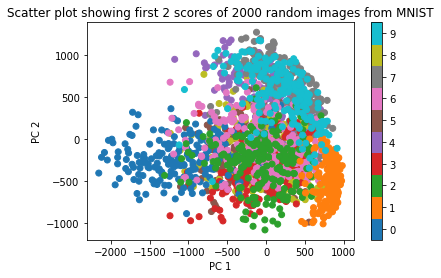

In [64]:
### Insert Code for Subtask 1.1 here ###
X = []  #initialize array for images 
Y = []  #initialize array for labels
files = os.listdir("/content/mnist") #list all folders from directory mnist

#from each folder in mnist sample 200 random images and read them 
for file in files:  
  images = Path("/content/mnist/"+file).glob('*.png')
  sampled_images  = random.sample(list(images), 200)
  for image in sampled_images:
    X.append(np.float64(imageio.imread(str(image)).ravel())) #add sampled images to X, ravel to convert shape from (28,28,3) to (784,1)
    Y.append(int(file[1]))

X = np.array(X).T #transpose X to convert images from rows to columns

S = linear_pca(X, k=2) #call linear_pca

PC1 = S[0] #score 1
PC2 = S[1] #score 2

#plot data
plt.scatter(PC1, PC2, c=Y, cmap='tab10')
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title("Scatter plot showing first 2 scores of 2000 random images from MNIST")

In [55]:
def gram_pca(K, k):
    ### Insert Code for Subtask 1.2 here ###

    #Center K using centering matrix
    N = K.shape[0]
    centering_matrix = (np.identity(N)) - (np.full((N, N), 1./N))
    K_c = centering_matrix @ K @ centering_matrix 
    
    # compute SVD 
    # K = X^TX = V.sigma^T.U^T.U.sigma.V^T = V.sigma^T.sigma.V^T = V.sigma^2.V^T
    #code from linear_pca used
    [V, Sigma_sq, VT] = np.linalg.svd(K_c, full_matrices=False)
    Sigma = np.sqrt(Sigma_sq)
    S = np.expand_dims(Sigma[:k],axis=1)*VT[:k, :]

    return S

Text(0.5, 1.0, 'Scatter plot showing first 2 scores of 2000 random images from MNIST using gram_pca')

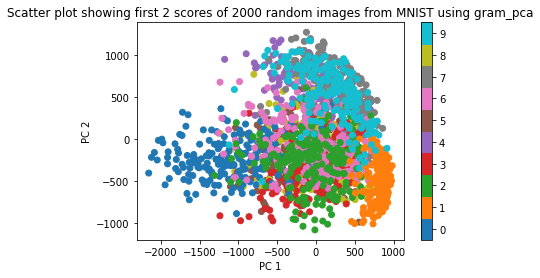

In [65]:
K = np.dot(X.T,X) #calculate K
S_gram = gram_pca(K, k =2) #call gram_pca

PC1 = S_gram[0] #score 1
PC2 = S_gram[1] #score 2

#plot data
plt.scatter(PC1, PC2, c=Y, cmap='tab10')
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title("Scatter plot showing first 2 scores of 2000 random images from MNIST using gram_pca")

In [89]:
def compute_gaussian_gram_matrix(X, sigma):
    ### Insert Code for Subtask 1.4 here ###

    #compute gaussian_gram_matrix
    # exp(-(x-x^t)^2 / 2*sigma^2)
    K_hat = np.zeros((X.shape[1], X.shape[1])) #initialize matrix for values of gram matrix

    for i in range(0,X.shape[1],1):
      for j in range(0,i,1):
        sq_diff = np.square(X[:,i] - X[:,j])
        sum_sq_diff = np.sum(sq_diff)
        K_hat[i,j] = np.exp((-sum_sq_diff)/(2*np.square(sigma))) #guassian gram matrix
        K_hat[j,i] = K[i,j] #K is symmetric
    return K_hat

def gaussian_kernel_pca(X, k, sigma):
    K=compute_gaussian_gram_matrix(X,sigma)
    S=gram_pca(K,k)
    return S

Text(0.5, 1.0, 'Scatter plot showing first 2 scores of 2000 random images from MNIST using guassian gram matrix')

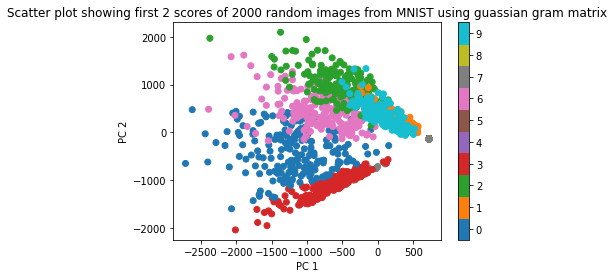

In [90]:
#Insert Code for Subtask 1.5 here

S_guassian_gram = gaussian_kernel_pca(X, k=2, sigma=1000) #call gaussian_kernel_pca
PC1 = S_guassian_gram[0] #score 1
PC2 = S_guassian_gram[1] #score 2

#plot data
plt.scatter(PC1, PC2, c=Y, cmap='tab10')
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title("Scatter plot showing first 2 scores of 2000 random images from MNIST using guassian gram matrix")